### Estimation of exchange interactions between spins by baysian method

reference : https://arxiv.org/abs/1701.09063

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
J = np.array([
    1,
    4,
    5,
    6,
    0,
    0,
    0
])

In [2]:
b = 0.1

In [31]:
interactions = np.array([
    [0,    J[0], J[1], J[3], 0,    0,    0,    0,    0,    0,    0,    0,    0],  # spin 1
    [J[0], 0,    J[2], J[0], 0, J[5],    0,    0,    0,    0,    0,    0,    0],  # spin 2
    [J[1], J[2], 0,    J[1], 0, J[4],    0,    0,    0,    0,    0,    0,    0],  # spin 3
    [J[3], J[0], J[1], 0,    J[1], J[0], J[3], 0,    0,    0,    0,    0,    0],  # spin 4
    [0,    0,    J[6], J[2], 0,    J[2], J[1], 0,    J[6], 0,    0,    0,    0],  # spin 5
    [0,    J[5], J[4], J[0], J[2], 0,    J[0], J[5], 0,    0,    0,    0,    0],  # spin 6
    [0,    0,    0,    J[3], J[1], J[0], 0,    J[0], J[1], J[3], 0,    0,    0],  # spin 7
    [0,    0,    0,    0,    0,    J[5], J[0], 0,    J[2], J[0], 0,    J[5], 0],  # spin 8
    [0,    0,    0,    0, J[6],    J[4], J[1], J[2], 0,    J[1], J[6], J[4], 0],  # spin 9
    [0,    0,    0,    0,    0,    0,    J[3], J[0], J[1], 0,    J[1], J[0], J[3]],  # spin 10
    [0,    0,    0,    0,    0,    0,    0,    0,    J[6], J[1], 0,    J[2], J[1]],  # spin 11
    [0,    0,    0,    0,    0,    0,    0,    J[5], J[4], J[0], J[2], 0,    J[0]],  # spin 12
    [0,    0,    0,    0,    0,    0,    0,    0,    0,    J[3], J[1], J[0], 0],  # spin 13
])

In [56]:
def spin_hamiltonian(spins, interactions, b, h=0.0):
    energy = 0.
    for i, s1 in enumerate(spins):
        for j, s2 in enumerate(spins):
            energy += interactions[i][j]*(s1*s2 + b*(s1*s2)**2)
    energy *= 0.5
    for s in spins:
        energy -= h*s
    return energy

In [60]:
spins = np.random.randint(0, 2, 13) - 0.5

In [61]:
spins

array([-0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5,
        0.5, -0.5])

In [62]:
spin_hamiltonian(spins, interactions, b, 1.4)

0.10312500000000013

In [63]:
print(2**14)

16384


In [64]:
def get_min_energy(interactions, b, h=0.0):
    spins = []
    min_energy = float('inf')
    for s1 in (-0.5, 0.5):
        for s2 in (-0.5, 0.5):
            for s3 in (-0.5, 0.5):
                for s4 in (-0.5, 0.5):
                    for s5 in (-0.5, 0.5):
                        for s6 in (-0.5, 0.5):
                            for s7 in (-0.5, 0.5):
                                for s8 in (-0.5, 0.5):
                                    for s9 in (-0.5, 0.5):
                                        for s10 in (-0.5, 0.5):
                                            for s11 in (-0.5, 0.5):
                                                for s12 in (-0.5, 0.5):
                                                    for s13 in (-0.5, 0.5):
                                                        s = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13]
                                                        energy = spin_hamiltonian(s, interactions, b, h)
                                                        if energy < min_energy:
                                                            spins = s.copy()
                                                            min_energy = energy
    return min_energy, spins

In [69]:
h_hist = []
m_hist = []
for h in range(20):
    min_energy, spins = get_min_energy(interactions, b, h)
    print('h : ', h)
    print('m : ', abs(sum(spins)))
    h_hist.append(h)
    m_hist.append(abs(sum(spins))/(len(spins)*0.5))

h :  0
m :  0.5
h :  1
m :  0.5
h :  2
m :  0.5
h :  3
m :  4.5
h :  4
m :  4.5
h :  5
m :  4.5
h :  6
m :  4.5
h :  7
m :  4.5
h :  8
m :  4.5
h :  9
m :  4.5
h :  10
m :  4.5
h :  11
m :  4.5
h :  12
m :  6.5
h :  13
m :  6.5
h :  14
m :  6.5
h :  15
m :  6.5
h :  16
m :  6.5
h :  17
m :  6.5
h :  18
m :  6.5
h :  19
m :  6.5


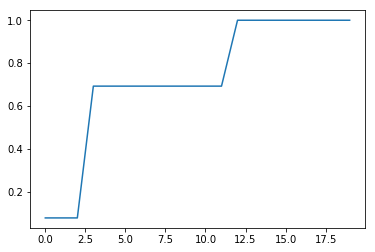

In [70]:
plt.plot(h_hist, m_hist)